# Classifying Mobile Prices Based on Specifications

**Title:** What makes mobile prices high or low?

**Author:** Seyoung Jung 

__1. Abstract:__ 

The dataset used for this project was obtained from [Kaggle](https://www.kaggle.com/iabhishekofficial/mobile-price-classification). The dataset is comprised of a total of 21 features, including the batter power, internal memory, weight, RAM, etc. And the target variable is an ordinal categorical variable (segments of selling price) which has values from 0 to 3 (0 indicates low cost). More detailed descriptions of the data can be found in the link above. The anticipated issue is that, since the total number of observations (rows) is only 3000, the models fit to the data might not perform perfectly. This project first performs exploratory data analysis to better understand the data. And it does feature engineering if necessary. After that, it builds multiple machine learning models, including softmax regression, neural network, support vector machine, random forest, naïve bayes, and k-nearest neighbors. Each model will be evaluated based on the precision, recall, and the F-1 score. Of the six listed algorithms, the first three algorithms achieve scores greater than 0.90 in the three evaluation metrics. 

__2. Introduction:__ 

Today, the rapid development of technology allows electronics companies to launch new products to customers. Especially, many consumers periodically update their smart phones, and therefore, the electronics market is highly competitive to attract shoppers. The best interest of consumers is better performance with lower price. Hence, determining reasonable price is a very important factor for businesses. Also, customers tend to want to judge if the price of the item is reasonable based on the specifications that they are interested in. Therefore, the goal of this data analysis project is to build machine learning models that classify price of the cell phones into four different segments (low cost, medium cost, high cost, and very high cost) based on various specifications. 

__3. Methods:__

This data analysis project report is comprised of four components: 

- __Exploratory Data Analysis:__ This project performs exploratory data analysis to explore the data and find patterns within the data through visualizing features. One can find relations among the variables, spot anomalies, find their distributions, etc. 

- __Data Cleaning / Feature Engineering:__ In this subsection, it cleans and transforms the data to increase the productivity and the performance of machine learning models. We merge, for instance, by adding or multiplying some of features to make them more useful or drop redundant features to avoid overfitting. 

- __Model Building:__ In this project, 6 classification algorithms are implemented, including softmax regression, neural network, support vector machine, random forest, naïve bayes, and k-nearest neighbors. The algorithms that achieve at least 0.90 of accuracy are selected for further hyperparameter tuning processes to generate more accurate results. 

- __Discussion:__ Principal component analysis is performed to identify how much of variation is explained by the first N components. And the PCA outcome is compared to feature importance generated by the best performing algorithms to see how they differ each other. 

__4. Process:__

In [1]:
# Import packages

from plotnine import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load the dataset
train = pd.read_csv('train.csv')

In [3]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In this dataset, there are a total of 21 features including the target variable ("price_range"): 
- battery_power: Total energy a battery can store in one time measured in mAh
- blue: Has bluetooth or not
- clock_speed: speed at which microprocessor executes instructions
- dual_sim: Has dual sim support or not
- fc: Front Camera mega pixels
- four_g: Has 4G or not
- int_memory: Internal Memory in Gigabytes
- m_dep: Mobile Depth in cm
- mobile_wt: Weight of mobile phone
- n_cores: Number of cores of processor
- pc: Primary Camera mega pixels
- px_height: Pixel Resolution Height
- px_width: Pixel Resolution Width
- ram: Random Access Memory in Megabytes
- sc_h: Screen Height of mobile in cm
- sc_w: Screen Width of mobile in cm
- talk_time: longest time that a single battery charge will last when you are
- three_g: Has 3G or not
- touch_screen: Has touch screen or not
- wifi: Has wifi or not
- price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

All of the variables are in either integer or float types even though some of the variables (e.g. blue, dual_sim, four_g, etc) shold be, in fact, categorical variables.  

__4.1 Exploratory Data Analysis:__

In [5]:
# For data visualization,create a copy of the original dataframe and convert data types of 8 variables
# And change the levels of categorical variables

new_train = train.copy()

col_names = ['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi', 'price_range']
for col in col_names:
    new_train[col] = new_train[col].astype('category',copy=False)
    
new_train.blue.replace((1, 0), ('Yes', 'No'), inplace=True)
new_train.dual_sim.replace((1, 0), ('Yes', 'No'), inplace=True)
new_train.four_g.replace((1, 0), ('Yes', 'No'), inplace=True)
new_train.three_g.replace((1, 0), ('Yes', 'No'), inplace=True)
new_train.touch_screen.replace((1, 0), ('Yes', 'No'), inplace=True)
new_train.wifi.replace((1, 0), ('Yes', 'No'), inplace=True)
new_train.price_range.replace((3, 2, 1, 0), ('Very high', 'High', 'Medium', 'Low'), inplace=True)

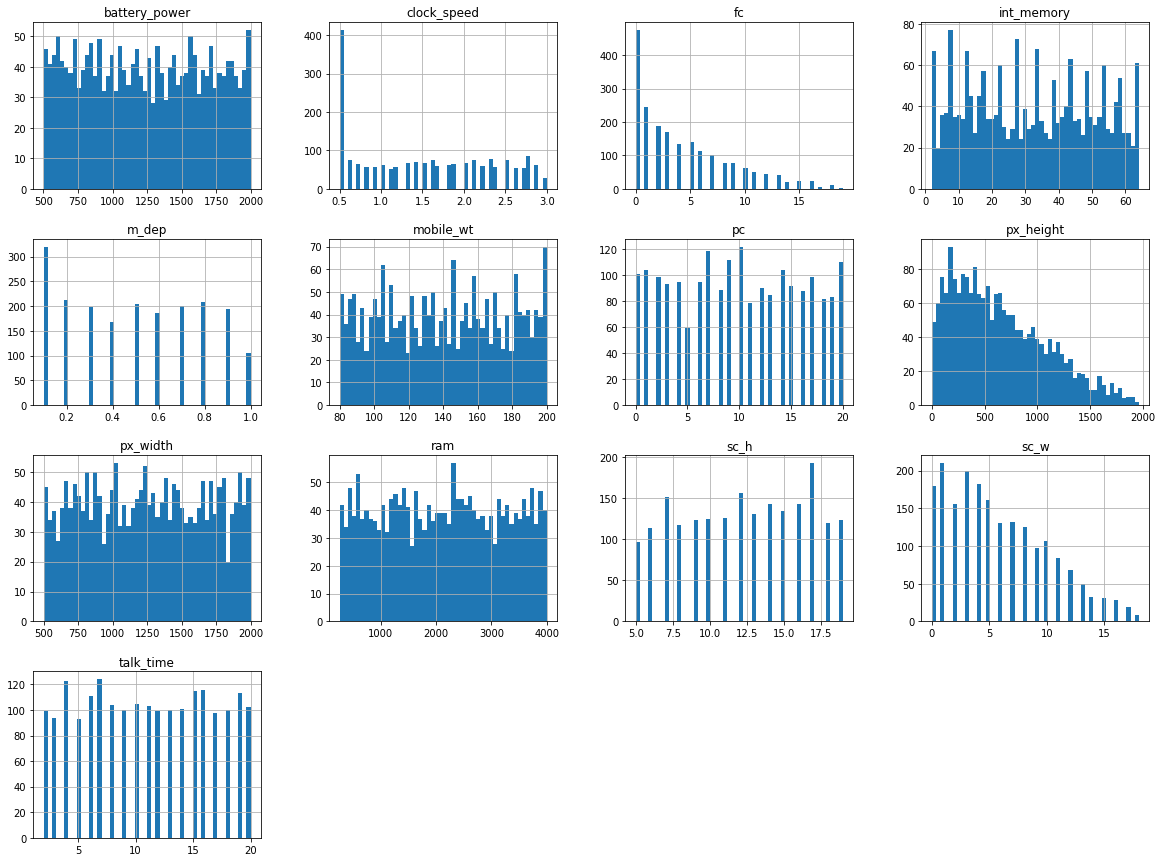

In [6]:
# Visualize continuous variables
new_train.hist(bins=50, figsize=(20,15))
plt.show(block=False)

Some "continuous" variables actually seem to be categorical variables, such as 'm_dep' and 'sc_h'. As you can see, most of the distributions of the continuous variables don’t show any obvious patterns, except for some of them such as the px_height. The others look like they randomly go up and down. 

<AxesSubplot:>

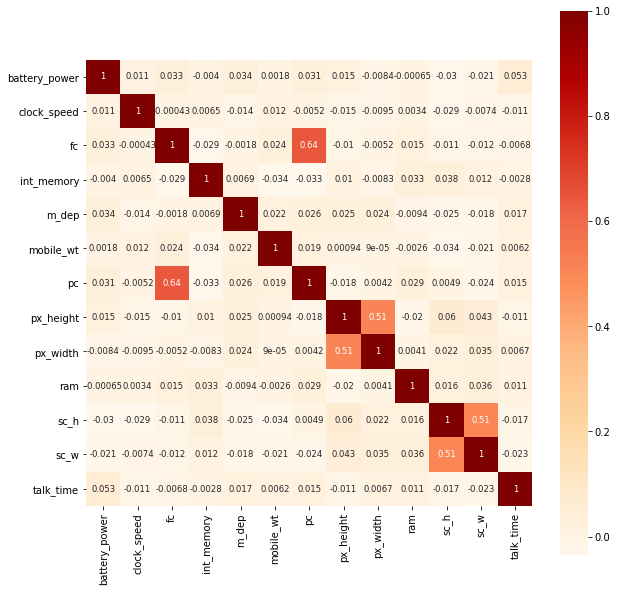

In [7]:
fig = plt.subplots(figsize=(10, 10))
sns.heatmap(new_train.corr(), annot = True, cbar = True, square = True, cmap="OrRd", annot_kws = {'size': 8.5})

Three pairs have correlations greater than 0.5; 'pc' & 'fc': 0.64 / 'px_height' & 'px_width': 0.51 / 'sc_h' & 'sc_w': 0.51. And the other pairs have extremely low correlations, most of them not exceeding 0.05.  

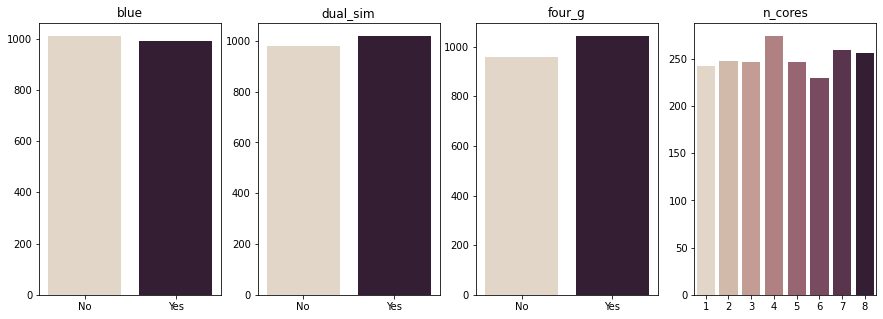

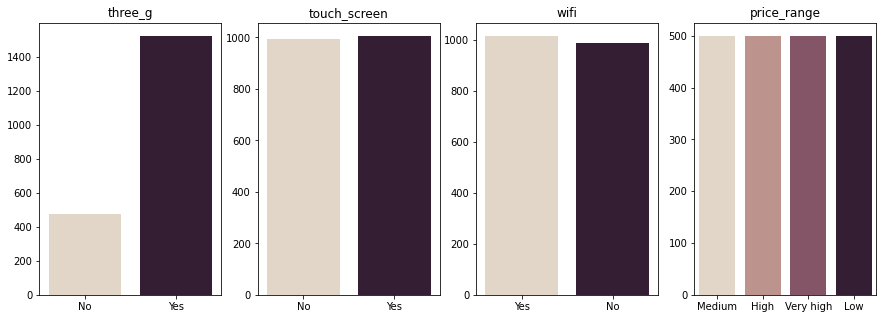

In [8]:
col_names = ['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi', 'price_range']

# Visualize the first four categorical variables
fig, axs = plt.subplots(ncols=4, figsize=(15,5))
j = 0
for i in col_names[:4]:
    sns.countplot(x=i, palette="ch:.25", data=new_train, ax=axs[j])
    axs[j].set_ylabel("")
    axs[j].set_xlabel("")
    axs[j].set_title(i)
    j = j+1
    
# Visualize the other last first four categorical variables
fig, axs = plt.subplots(ncols=4, figsize=(15,5))
j = 0
for i in col_names[4:]:
    sns.countplot(x=i, palette="ch:.25", data=new_train, ax=axs[j])
    axs[j].set_ylabel("")
    axs[j].set_xlabel("")
    axs[j].set_title(i)
    j = j+1

We can see that most of the categorical features are almost equally distributed without any missingness, including the label ("price_range") except for the "three_g". 

Text(0.5, 0, 'Screen height')

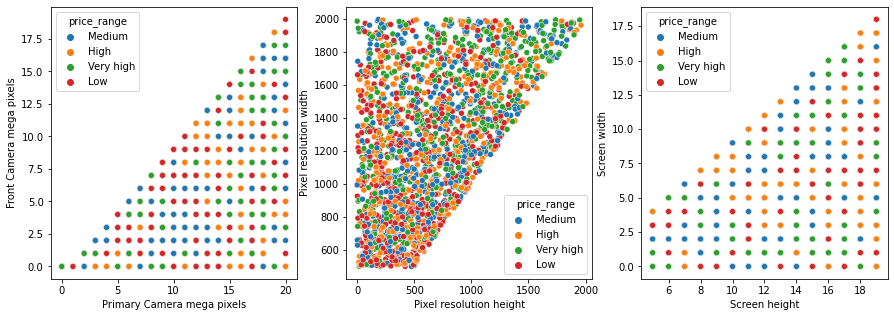

In [9]:
fig, axs = plt.subplots(ncols=3, figsize=(15,5))
sns.scatterplot(x="pc", y="fc", hue="price_range", data=new_train, ax=axs[0])
axs[0].set_ylabel("Front Camera mega pixels")
axs[0].set_xlabel("Primary Camera mega pixels")
sns.scatterplot(x="px_height", y="px_width", hue="price_range", data=new_train, ax=axs[1])
axs[1].set_ylabel("Pixel resolution width")
axs[1].set_xlabel("Pixel resolution height")
sns.scatterplot(x="sc_h", y="sc_w", hue="price_range", data=new_train, ax=axs[2])
axs[2].set_ylabel("Screen width")
axs[2].set_xlabel("Screen height")

The pair “front and primary camera pixel” has a correlation of 0.64, another pair “pixel resolution height and width” has a correlation of 0.51, and the other pair “screen height and width” has a correlation of 0.51 as well. 

In [10]:
# Two categorical variables provide information on their generation ('three_g', 'four_g').
# Combine the two and create a new variable 

new_train["generation"] = ""

for i in range(new_train.shape[0]):
    if new_train["three_g"][i] == 'Yes' and new_train["four_g"][i] == 'Yes':
        new_train["generation"][i] = '4G'
    elif new_train["three_g"][i] == 'Yes' and new_train["four_g"][i] == 'No':
        new_train["generation"][i] = '3G'
    else:
        new_train["generation"][i] = '2G'

drop_var = ["three_g", "four_g"]
new_train = new_train.drop(drop_var, 1)        
        
new_train

<ipython-input-10-d3816c505200>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-10-d3816c505200>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-10-d3816c505200>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,battery_power,blue,clock_speed,dual_sim,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,touch_screen,wifi,price_range,generation
0,842,No,2.2,No,1,7,0.6,188,2,2,20,756,2549,9,7,19,No,Yes,Medium,2G
1,1021,Yes,0.5,Yes,0,53,0.7,136,3,6,905,1988,2631,17,3,7,Yes,No,High,4G
2,563,Yes,0.5,Yes,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,Yes,No,High,4G
3,615,Yes,2.5,No,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,No,No,High,3G
4,1821,Yes,1.2,No,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,Yes,No,Medium,4G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,Yes,0.5,Yes,0,2,0.8,106,6,14,1222,1890,668,13,4,19,Yes,No,Low,4G
1996,1965,Yes,2.6,Yes,0,39,0.2,187,4,3,915,1965,2032,11,10,16,Yes,Yes,High,3G
1997,1911,No,0.9,Yes,1,36,0.7,108,8,3,868,1632,3057,9,1,5,Yes,No,Very high,4G
1998,1512,No,0.9,No,4,46,0.1,145,5,5,336,670,869,18,10,19,Yes,Yes,Low,4G


Text(0.5, 0, 'Price Range')

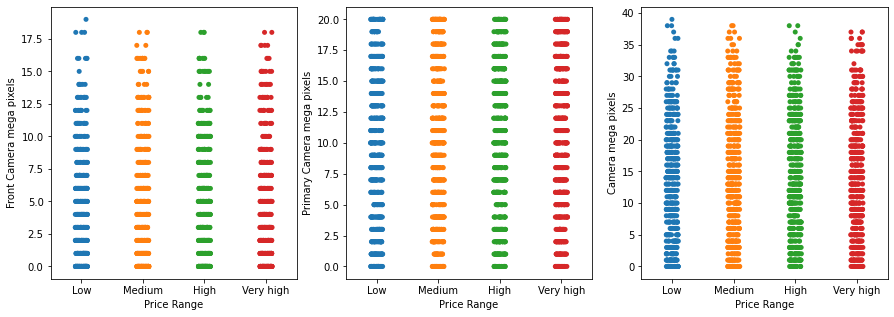

In [11]:
# Create three plots against price range: front camera mega pixels, primary camera mega pixels, camera mega pixels

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

new_train_copy = new_train.copy()
new_train_copy['cam_pix'] = new_train_copy["fc"] + new_train_copy["pc"]

sns.stripplot(x="price_range", order=["Low", "Medium", "High", "Very high"], y="fc", data=new_train_copy, ax=axs[0])
axs[0].set_ylabel("Front Camera mega pixels")
axs[0].set_xlabel("Price Range")
sns.stripplot(x="price_range", order=["Low", "Medium", "High", "Very high"], y="pc", data=new_train_copy, ax=axs[1])
axs[1].set_ylabel("Primary Camera mega pixels")
axs[1].set_xlabel("Price Range")
sns.stripplot(x="price_range", order=["Low", "Medium", "High", "Very high"], y="cam_pix", data=new_train_copy, ax=axs[2])
axs[2].set_ylabel("Camera mega pixels")
axs[2].set_xlabel("Price Range")

In [12]:
# Create a new variable ('pixel_dimension') by multiplying 'px_width' and 'px_height' and drop them as they are correlated
new_train["pixel_dimension"] = new_train["px_width"] * new_train["px_height"]
drop_var = ["px_width", "px_height"]
new_train = new_train.drop(drop_var, 1)

# Create another new variable ('screen_dimension') by multiplying 'sc_w' and 'sc_h' and drop them as they are correlated
new_train["screen_dimension"] = new_train["sc_w"] * new_train["sc_h"]
drop_var = ["sc_w", "sc_h"]
new_train = new_train.drop(drop_var, 1)

Text(0.5, 0, 'Price Range')

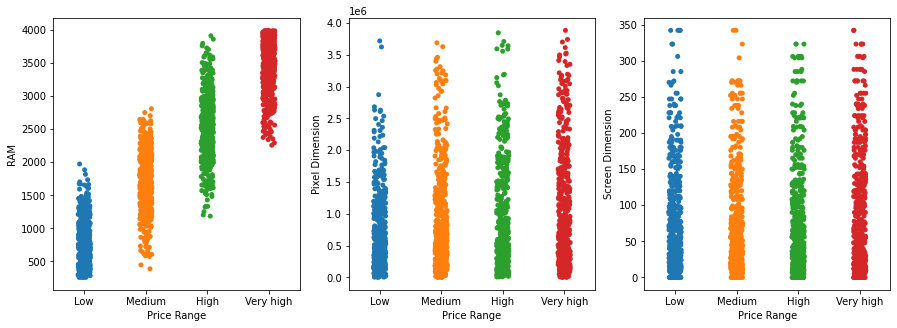

In [13]:
# Create three plots against price range: RAM, pixel dimension, screen dimension

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.stripplot(x="price_range", order=["Low", "Medium", "High", "Very high"], y="ram", data=new_train, ax=axs[0])
axs[0].set_ylabel("RAM")
axs[0].set_xlabel("Price Range")
sns.stripplot(x="price_range", order=["Low", "Medium", "High", "Very high"], y="pixel_dimension", data=new_train, ax=axs[1])
axs[1].set_ylabel("Pixel Dimension")
axs[1].set_xlabel("Price Range")
sns.stripplot(x="price_range", order=["Low", "Medium", "High", "Very high"], y="screen_dimension", data=new_train, ax=axs[2])
axs[2].set_ylabel("Screen Dimension")
axs[2].set_xlabel("Price Range")

A continuous variable that has the strongest relation with the target variable is the RAM size. As the RAM size gets larger, the price range increases. And we can see that as the pixel dimension increases from 2.5, the price range also increases. Screen dimension doesn’t seem to be related much to the target variable. 

<AxesSubplot:xlabel='n_cores', ylabel='battery_power'>

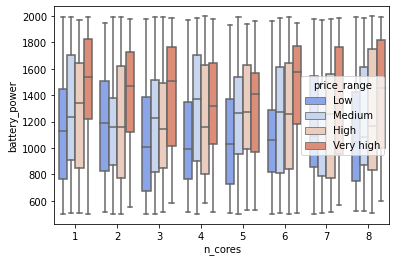

In [14]:
sns.boxplot(x="n_cores", y="battery_power", hue="price_range", hue_order=["Low", "Medium", "High", "Very high"], data=new_train, palette="coolwarm")

Normally, mobile phones with the larger number of cores and higher battery power become more expensive. 

In [15]:
# Plot stacked barplots for the categorical variables. 

df1 = pd.crosstab(new_train["price_range"], new_train["generation"]) / new_train.shape[0]
df2 = pd.crosstab(new_train["price_range"], new_train["n_cores"]) / new_train.shape[0]
df3 = pd.crosstab(new_train["price_range"], new_train["blue"]) / new_train.shape[0]
df4 = pd.crosstab(new_train["price_range"], new_train["dual_sim"]) / new_train.shape[0]
df5 = pd.crosstab(new_train["price_range"], new_train["touch_screen"]) / new_train.shape[0]
df6 = pd.crosstab(new_train["price_range"], new_train["wifi"]) / new_train.shape[0]

<AxesSubplot:xlabel='price_range'>

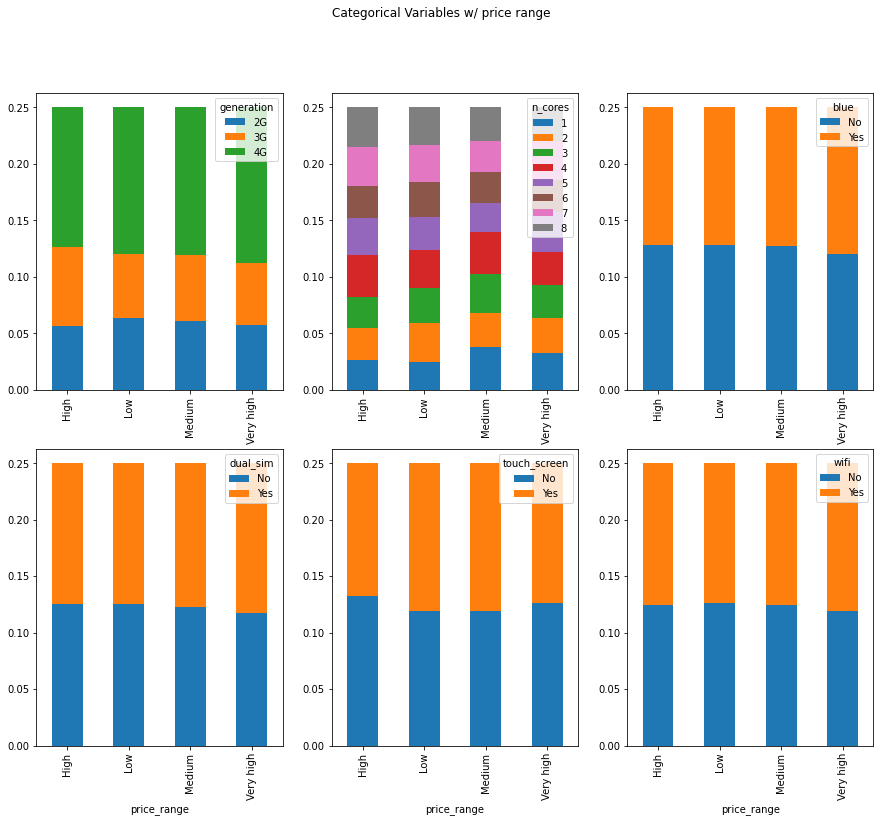

In [16]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, ncols=3, figsize=(15,12))
fig.suptitle('Categorical Variables w/ price range')

df1.plot(kind='bar', stacked=True, ax=ax1)
df2.plot(kind='bar', stacked=True, ax=ax2)
df3.plot(kind='bar', stacked=True, ax=ax3)
df4.plot(kind='bar', stacked=True, ax=ax4)
df5.plot(kind='bar', stacked=True, ax=ax5)
df6.plot(kind='bar', stacked=True, ax=ax6)

__4.2 Data Cleaning / Feature Engineering:__

In [17]:
from mobile_feat_eng import feat_eng

In [18]:
feat_eng(train)

<ipython-input-17-b86294182261>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-b86294182261>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-17-b86294182261>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [19]:
# Drop rows that contain 0 in the new variables as they don't make sense
train = train.loc[~((train['pixel_dimension'] == 0) | (train['screen_dimension'] == 0))]

In [20]:
# Convert the object into integer type
train['generation'] = train['generation'].astype(str).astype(int)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1819 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   battery_power     1819 non-null   int64  
 1   blue              1819 non-null   int64  
 2   clock_speed       1819 non-null   float64
 3   dual_sim          1819 non-null   int64  
 4   fc                1819 non-null   int64  
 5   four_g            1819 non-null   int64  
 6   int_memory        1819 non-null   int64  
 7   m_dep             1819 non-null   float64
 8   mobile_wt         1819 non-null   int64  
 9   n_cores           1819 non-null   int64  
 10  pc                1819 non-null   int64  
 11  px_height         1819 non-null   int64  
 12  px_width          1819 non-null   int64  
 13  ram               1819 non-null   int64  
 14  sc_h              1819 non-null   int64  
 15  sc_w              1819 non-null   int64  
 16  talk_time         1819 non-null   int64  


In [22]:
# Split data into training and test (validation) sets. 

X = train.drop(["price_range"], axis=1)
Y = train["price_range"].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [23]:
# Standardize the continuous features 

col_names = list(X_train.columns)
features = X_train[col_names]
features_test = X_test[col_names]

ct = ColumnTransformer([
        ('somename', StandardScaler(), ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'pixel_dimension', 'screen_dimension', 'camera_pixels'])
    ], remainder='passthrough')

X_train_transformed = ct.fit_transform(features)
X_test_transformed = ct.transform(features_test)

__4.3 Model Building:__

 In this section, six classification algorithms are implemented: softmax regression, neural network, support vector machine, random forest, naive bayes, and k-nearest neighbors.  

__4.3.1 Softmax Regression- W/O tuning: 0.98 & GridsearchCV: 0.98__

[Stanford University’s UFLDL](http://deeplearning.stanford.edu/tutorial/supervised/SoftmaxRegression/) defines softmax regression as “a generalization of logistic regression to the case where we want to handle multiple classes.” In this problem, the label y can take on 4 values because the price range has values 0, 1, 2, and 3. Cross Entropy is suitable for cost function, because minimizing the cross entropy suppresses the model that predicts the target class with low probability. 

In [24]:
# Without tuning

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, max_iter=3000)
softmax_reg.fit(X_train_transformed, Y_train)

print(softmax_reg.score(X_train_transformed, Y_train))   # train error
print(softmax_reg.score(X_test_transformed, Y_test))     # test error

predictions = softmax_reg.predict(X_test_transformed)
print(classification_report(Y_test, predictions))

0.9846041055718475
0.978021978021978
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       107
           1       0.97      0.97      0.97       115
           2       0.98      0.96      0.97       119
           3       0.97      0.99      0.98       114

    accuracy                           0.98       455
   macro avg       0.98      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455



Using the model regulation (C=10) with 3,000 iterations, the accuracy of 0.985 and 0.978 were obtained from the training and test set, respectively. Since the two values are considerably close, one can conclude that the model is not overfitting to the training set.

To further improve the performance of this algorithm, hyperparameter tuning was performed to adjust the tolerance, regulation, etc. 

In [25]:
# Grid search for softmax regression

params = {'C':[1, 5, 10, 15, 50, 100], 'tol': [0.001, 0.0001, 0.005]}
log_reg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=3000, penalty='l2')
clf = GridSearchCV(log_reg, params, refit='True', n_jobs=1, verbose=3, cv=5)
clf.fit(X_train_transformed, Y_train)

print(clf.score(X_train_transformed, Y_train))   # train error
print(clf.score(X_test_transformed, Y_test))     # test error

predictions = clf.predict(X_test_transformed)
print(classification_report(Y_test, predictions))

print(clf.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END ....................C=1, tol=0.001;, score=0.952 total time=   0.4s
[CV 2/5] END ....................C=1, tol=0.001;, score=0.934 total time=   0.4s
[CV 3/5] END ....................C=1, tol=0.001;, score=0.952 total time=   0.4s
[CV 4/5] END ....................C=1, tol=0.001;, score=0.941 total time=   0.3s
[CV 5/5] END ....................C=1, tol=0.001;, score=0.963 total time=   0.4s
[CV 1/5] END ...................C=1, tol=0.0001;, score=0.952 total time=   0.3s
[CV 2/5] END ...................C=1, tol=0.0001;, score=0.934 total time=   0.3s
[CV 3/5] END ...................C=1, tol=0.0001;, score=0.952 total time=   0.5s
[CV 4/5] END ...................C=1, tol=0.0001;, score=0.941 total time=   0.5s
[CV 5/5] END ...................C=1, tol=0.0001;, score=0.963 total time=   0.5s
[CV 1/5] END ....................C=1, tol=0.005;, score=0.952 total time=   0.4s
[CV 2/5] END ....................C=1, tol=0.005;

Although grid search method suggested other combinations of hyperparameters, the accuracy stays the same. One can conclude that this is the best outcome you can get from this algorithm. The table above shows that each of the levels in the target variable are classified equally well. 

__4.3.2 Neural Network w/ Scikit Learn - W/O tuning: 0.95, & GridsearchCV: 0.95__

Neural network is known as one of the most popular machine learning techniques today. There are several types of neural network; convolutional neural network, recurrent neural network, multilayer perceptron, etc. For this problem, multilayer perceptron was implemented. According to the  [Scikit Learn official website](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html), “this model optimizes the log loss function using LBFGS or stochastic gradient descent.” Since the sample size is relatively small, LBFGS was used because it can converge faster to the optimal value and generate better outcomes. 

In [26]:
# Without tuning

NN = MLPClassifier(solver='lbfgs', alpha=0.1, hidden_layer_sizes=(150, 10), random_state=1, max_iter=3000)
NN.fit(X_train_transformed, Y_train)

print(NN.score(X_train_transformed,Y_train))   # train error
print(NN.score(X_test_transformed,Y_test))     # test error

y_true, y_pred = Y_test, NN.predict(X_test_transformed)
print(classification_report(y_true, y_pred))

1.0
0.9560439560439561
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       107
           1       0.93      0.97      0.94       115
           2       0.98      0.92      0.95       119
           3       0.95      0.99      0.97       114

    accuracy                           0.96       455
   macro avg       0.96      0.96      0.96       455
weighted avg       0.96      0.96      0.96       455



Since the model is overfitting, grid search method was performed to find a better regularization term. 

In [27]:
# Grid search for neural network

mlp = MLPClassifier(max_iter=100)
parameter_space = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (150, 10), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [0.0001, 0.05, 0.1, 1],
    'learning_rate': ['constant','adaptive']
}
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train_transformed, Y_train)

C:\Users\Martin\anaconda3\envs\keras_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.


GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05, 0.1, 1],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (150, 10), (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam', 'lbfgs']})

In [28]:
print(clf.score(X_train_transformed,Y_train))   # train error
print(clf.score(X_test_transformed,Y_test))     # test error

y_true, y_pred = Y_test, clf.predict(X_test_transformed)
print(classification_report(y_true, y_pred))

print(clf.best_params_)

0.9882697947214076
0.9604395604395605
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       107
           1       0.95      0.96      0.95       115
           2       0.98      0.92      0.95       119
           3       0.95      0.99      0.97       114

    accuracy                           0.96       455
   macro avg       0.96      0.96      0.96       455
weighted avg       0.96      0.96      0.96       455

{'activation': 'tanh', 'alpha': 1, 'hidden_layer_sizes': (150, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}


The result stays the same as before. Hence, this might be the best result it can generate. However, this new combination prevented the overfitting problem by reducing the accuracy from the training set to 0.986. Although the recall rate for the ‘high cost’ is relatively lower than the others, it is still high enough. 

__4.3.3 Support Vector Machine (SVC) - W/O tuning: 0.91 & GridsearchCV: 0.97__

Support vector machine can be used to find the optimal hyperplane that differentiates classes. And there are mainly four different kernels for decision function: linear, polynomial, radial basis function, and sigmoid. This algorithm is popular because of its simplicity and good performance.

Since the dataset is not large, SVC was used instead of LinearSVC or SGDClassifier. This implementation uses a one-vs-one scheme for multiclass classification. In support vector classifier, radial basis function (RBF) is widely used as a kernel. 

In [29]:
# Without tuning

svm=SVC(random_state=1, coef0=0, C=1, gamma= 'scale', kernel='rbf', decision_function_shape='ovo')
svm.fit(X_train_transformed, Y_train)

print(svm.score(X_train_transformed, Y_train))   # train error
print(svm.score(X_test_transformed, Y_test))     # test error

predictions = svm.predict(X_test_transformed)
print(classification_report(Y_test, predictions))

0.9486803519061584
0.9142857142857143
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       107
           1       0.88      0.85      0.86       115
           2       0.88      0.92      0.90       119
           3       0.98      0.95      0.96       114

    accuracy                           0.91       455
   macro avg       0.92      0.91      0.92       455
weighted avg       0.91      0.91      0.91       455



In order to find better hyperparameter combinations and improve the algorithm, grid search was performed. 

In [30]:
# Grid search for support vector machine

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.001, 0.0001], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
clf_svc = GridSearchCV(SVC(), tuned_parameters, refit = True, verbose = 3)

clf_svc.fit(X_train_transformed, Y_train)

print(clf.best_params_)

means = clf_svc.cv_results_['mean_test_score']
stds = clf_svc.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf_svc.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

print(clf_svc.score(X_train_transformed, Y_train))   # train error
print(clf_svc.score(X_test_transformed, Y_test))     # test error
    
y_true, y_pred = Y_test, clf_svc.predict(X_test_transformed)
print(classification_report(y_true, y_pred))

print(clf_svc.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.670 total time=   0.5s
[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.634 total time=   0.4s
[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.663 total time=   0.5s
[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.663 total time=   0.4s
[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.669 total time=   0.4s
[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.256 total time=   0.4s
[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.256 total time=   0.4s
[CV 3/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.253 total time=   0.4s
[CV 4/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.253 total time=   0.4s
[CV 5/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.254 total time=   0.4s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.908 total time=   0.2s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;

After this process, the accuracy from the test set was greatly improved from 0.914 to 0.969. This result was obtained by using linear as a kernel instead of RBF. The table below shows that this algorithm classifies all four levels in the target variable equally well. 

__4.3.4 Random Forest - W/O tuning: 0.84__

Random forest is one of the ensemble methods. It fits decision tree classifier many times and use all of the results to produce one better result. Random Forest classifier takes various inputs as parameters. For example, it takes the number of trees, the maximum depth of the tree, the maximum leaf nodes, etc.

Bootstrap method was used to build trees with bootstrap samples. Also, in order to avoid overfitting issues, out-of-bag samples were used to approximate the score. 

In [31]:
# Without tuning

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=20, n_jobs=-1, oob_score=True)
rnd_clf.fit(X_train_transformed, Y_train)

print(rnd_clf.score(X_train_transformed, Y_train))   # train error
print(rnd_clf.score(X_test_transformed, Y_test))     # test error

y_true, y_pred = Y_test, rnd_clf.predict(X_test_transformed)
print(classification_report(y_true, y_pred))

0.9362170087976539
0.8395604395604396
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       107
           1       0.79      0.77      0.78       115
           2       0.79      0.71      0.75       119
           3       0.85      0.96      0.91       114

    accuracy                           0.84       455
   macro avg       0.84      0.84      0.84       455
weighted avg       0.84      0.84      0.84       455



By fitting 500 trees with maximum of 20 leaf nodes, the accuracy of 0.840 was obtained from the test set. Although this accuracy is good, it is lower than the previous three algorithms. As the table above shows, the overall scores (precision and recall) for class 1 and 2 (medium cost and high cost) are relatively lower than the other two classes. 

__4.3.5 Naive Bayes - W/O tuning: 0.79__

Naïve Bayes classification is a method that is based on Bayes’ Theorem. This algorithm is also widely used for classification problems because of its high speed and effectiveness. 

[The Optimality of Naïve Bayes](https://www.cs.unb.ca/~hzhang/publications/FLAIRS04ZhangH.pdf) which was published by Dr. Harry Zhang from University of New Brunswick states “its competitive performance in classification is surprising, because the conditional independence assumption on which it is based, is rarely true in real world.” 


In [32]:
gnb = GaussianNB(priors=None, var_smoothing=1e-09)
gnb.fit(X_train_transformed, Y_train)
print(gnb.score(X_train_transformed,Y_train))   # train error
print(gnb.score(X_test_transformed,Y_test))     # test error

y_true, y_pred = Y_test, gnb.predict(X_test_transformed)
print(classification_report(y_true, y_pred))

0.8137829912023461
0.7934065934065934
              precision    recall  f1-score   support

           0       0.94      0.82      0.88       107
           1       0.69      0.71      0.70       115
           2       0.70      0.74      0.72       119
           3       0.87      0.90      0.89       114

    accuracy                           0.79       455
   macro avg       0.80      0.79      0.80       455
weighted avg       0.80      0.79      0.79       455



As the previous case in the Random Forest section, the precision and recall values for ‘medium cost’ and ‘high cost’ are low compared to the other two levels. 

__4.3.6 K-Nearest Neighbors - W/O tuning: 0.54__

K-nearest neighbors is an unsupervised learning algorithm. KNN algorithm takes votes from K points that are closest to the point you are trying to classify. As the name suggest, this algorithm takes the number of neighbors as an input of which the devalue value is 5. Also, since it measures the distance between the points, it takes distance measurement method as an input, such as Manhattan or Euclidean distance, as well as the weight function. 

For this problem, the Euclidean distance was used with the uniform function as a weight function. Also, 9 closest points are selected to measure the distance instead of the default value, as it performs very bad on this dataset. 

In [33]:
knn = KNeighborsClassifier(n_neighbors=9, weights='uniform', algorithm='auto')
knn.fit(X_train_transformed,Y_train)

print(knn.score(X_train_transformed,Y_train))   # train error
print(knn.score(X_test_transformed,Y_test))     # test error

y_true, y_pred = Y_test, knn.predict(X_test_transformed)
print(classification_report(y_true, y_pred))

0.6935483870967742
0.5428571428571428
              precision    recall  f1-score   support

           0       0.65      0.75      0.69       107
           1       0.37      0.39      0.38       115
           2       0.44      0.43      0.43       119
           3       0.76      0.62      0.68       114

    accuracy                           0.54       455
   macro avg       0.55      0.55      0.55       455
weighted avg       0.55      0.54      0.54       455



The table above shows that the precision and recall for ‘medium cost’ are very low compared to the ‘low cost’ and ‘very high cost’. Also, the ‘high cost’ is not classified well. 

__4.4 Discussion:__

In the model building part, a total of six algorithms were implemented. Most of the algorithms here worked pretty well, considering there is a probability of 0.25 to correctly guess for each price range class. And as the organized table below shows, the softmax regression has outperformed other advanced algorithms such as neural network and random forest. 

In turn, principal component analysis was performed to further understand the data and identify how much of variation is explained by the first N components. 

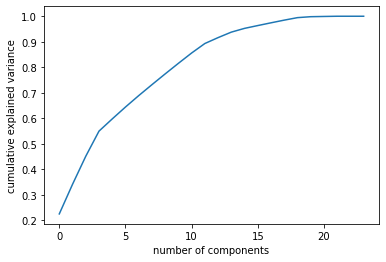

In [34]:
# PCA plot

pca = PCA().fit(X_train_transformed)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

The plot shows how much of the 24-dimensional variance is explained by the first N components. For instance, the first 5 components explain roughly 60% of the total variance. But in order to have at least 90% of explanation on the total variance, additional 7 components are needed. 

<AxesSubplot:>

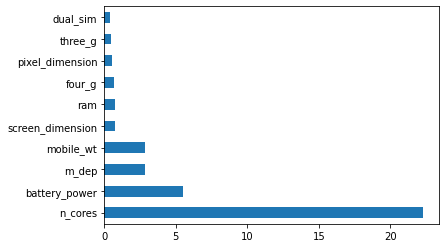

In [35]:
# Softmax regression: Top 10 variables that affect the target variable the most

pd.Series(abs(softmax_reg.coef_[0]), index=features.columns).nlargest(10).plot(kind='barh')

<AxesSubplot:>

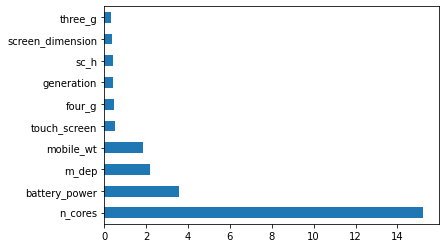

In [36]:
# Support vector machine: Top 10 variables that affect the target variable the most

svm=SVC(random_state=1, C=10, kernel='linear')
svm.fit(X_train_transformed, Y_train)
pd.Series(abs(svm.coef_[0]), index=features.columns).nlargest(10).plot(kind='barh')

One can compare the two feature importance plots above generated based on the softmax regression and support vector machine. It can be observed that the order of importance is quite similar. By comparing the two plots, one can observe that that the importance of n_cores (the number of core processors) is much higher in the softmax regression. Also, contrary to expectations, the RAM does not contribute much to the classification algorithms.

Lastly, there is a great chance that the models can be further improved by finding even better combinations of hyperparameters, or even adding more data. And it is worth further investigating the reason for having low accuracy for ‘medium cost’ and ‘high cost’ from random forest, naïve bayes, and k-nearest neighbors algorithms. By identifying the reason, it would be possible to improve the performance of the algorithms.